# Lab 2: Scikit-learn, kNN, and Decision Trees


In this lab we'll get some hands on experience with scikitlearn as well as two of the classifiers we've seen in class
- K Nearest Neighbors
- Decision Trees

## Goals for this lab

- Get an overview of sklearn


- Understand the practical implications for changing the parameters used in KNearest Neighbor Classifier
  - k
  - distance metric
  - weighting method
  
  
- Understand the practical implications for changing the parameters used in Decision Trees
 - splitting criteria (gini vs information gain)
 - max depth
 - min sample size for split
 
 
- Understand how to interpret Decision Trees

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import graphviz # If you don't have this, install via pip/conda
from tqdm import tqdm
%matplotlib inline

# Data
We'll use these classifiers on a subset of the data set from https://www.kaggle.com/new-york-state/nys-patient-characteristics-survey-pcs-2015

The data has been downloaded, modified, and is in the github repo for the lab

You should also try this with other data sets you have been provided for the homeworks.

In [2]:
# Change this to wherever you're storing your data
datafile = '../data/nysmedicaldata.csv'
df = pd.read_csv(datafile)

In [3]:
df.head()

,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


In [4]:
df.dtypes

Region Served                       object
Age Group                           object
Sex                                 object
Transgender                         object
Sexual Orientation                  object
Hispanic Ethnicity                  object
Race                                object
Living Situation                    object
Household Composition               object
Preferred Language                  object
Veteran Status                      object
Employment Status                   object
Number Of Hours Worked Each Week    object
Education Status                    object
Special Education Services          object
Mental Illness                      object
Intellectual Disability             object
Autism Spectrum                     object
Other Developmental Disability      object
Alcohol Related Disorder            object
Drug Substance Disorder             object
Mobility Impairment Disorder        object
Hearing Visual Impairment           object
Hyperlipide

# Some Quick Data Exploration
Before running any sort of model on your dataset, it's always a good idea to do some quick data exploration to get a sense of how your data looks like. Try to answer the following questions with some sort of plot/histogram/etc:

1) What do the distributions of each feature look like?

In [5]:
# Describing all the Numerical Features
df.describe()

,Three Digit Residence Zip Code
count,8671.000000
mean,221.575366
std,270.141894
min,100.000000
25%,109.000000
50%,116.000000
75%,138.000000
max,999.000000


In [6]:
# Describing all the Categorical Features
df.describe(include=['O'])

,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,...,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status
count,8671,8671,8671,8671,8671,8671,8671,8671,8671,8671,...,8671,8671,8671,8671,8671,8671,8671,8671,8671,8671
unique,5,2,3,4,6,3,5,4,4,7,...,3,3,2,3,4,3,3,3,3,3
top,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,NOT APPLICABLE,ENGLISH,...,NO,NO,NO,YES,NOT APPLICABLE,NO,NO,NO,NO,NO
freq,3650,7461,5284,8415,7432,7129,4342,4228,4332,8031,...,7361,6693,8489,4809,3862,6457,7297,8391,8171,6137


In [7]:
df.head()

,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,...,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


# Using scikitlearn for classification

sklearn is a very useful python packager for building machiune learning models. To build a model in sklearn, you need to have a matrix (or dataframe) with X and y columns. X is your set of features/predictors. y is a single column that is your label. We'll take the foll;owing steps:

1. Select/create column as label/outcome (y)
2. Select/create columns as features (X)
3. Create Training Set
4. Create Validation Set
5. Build model on Training Set
6. Predict risk scores for the Validation Set
7. Calculate performance metric(s)

## Some useful things to know in sklearn

fit = train an algorithm

predict_proba = predict a "risk" score for all possible classes for a given record (classification only)


## Important- never use .predict
There is also a function called "predict" which first runs predict_probs and then predicts a 1 if the score > 0.5 and 0 otherwise. *Never* use that function since 0.5 is a completely arbitrary threshold to call a prediction 1 vs 0.



## 1. Create label/outcome
One thing we can do with this dataset is to try to use the various feature columns to classify whether a person has High Blood Pressure. Let's create a column that is 1 if a person has High Blood Pressure and 0 otherwise

In [14]:
# code
df['HBP'] = np.where(df['High Blood Pressure']=='YES',1,0)
df['HBP'].value_counts()/len(df)

0    0.783993
1    0.216007
Name: HBP, dtype: float64

### Question: what percentage of people have High Blood Pressure?

In [16]:
# code
df['HBP'].mean()

0.21600738092492217

## 2. create or select existing predictors/features

For now, let's take a handful of existing columns to use.

sklearn needs features to be numeric and not categorical so we'll have to turn our selected features to be binary (also known as dummy variables)

In [17]:
df.columns

Index(['Region Served', 'Age Group', 'Sex', 'Transgender',
       'Sexual Orientation', 'Hispanic Ethnicity', 'Race', 'Living Situation',
       'Household Composition', 'Preferred Language', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Smo

In [18]:
cols_to_transform = [ 'Sex', 'Race', 'Obesity', 'Smokes', 'Alcohol Related Disorder','Drug Substance Disorder',
                    'Criminal Justice Status','Private Insurance']
df = pd.get_dummies( df, dummy_na=True, columns = cols_to_transform )
df.head()

,Region Served,Age Group,Transgender,Sexual Orientation,Hispanic Ethnicity,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,...,Drug Substance Disorder_YES,Drug Substance Disorder_nan,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_nan,Private Insurance_NO,Private Insurance_UNKNOWN,Private Insurance_YES,Private Insurance_nan
0,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
1,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,1,0,0,0,1,0,1,0,0,0
2,HUDSON RIVER REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
3,NEW YORK CITY REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,0,0,1,0,1,0,0,0
4,LONG ISLAND REGION,ADULT,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,...,0,0,1,0,0,0,1,0,0,0


In [20]:
df.describe()

,Three Digit Residence Zip Code,HBP,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Sex_nan,Race_BLACK ONLY,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,...,Drug Substance Disorder_YES,Drug Substance Disorder_nan,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_nan,Private Insurance_NO,Private Insurance_UNKNOWN,Private Insurance_YES,Private Insurance_nan
count,8671.000000,8671.000000,8671.000000,8671.000000,8671.000000,8671.0,8671.000000,8671.000000,8671.000000,8671.000000,...,8671.000000,8671.0,8671.000000,8671.000000,8671.000000,8671.0,8671.000000,8671.000000,8671.000000,8671.0
mean,221.575366,0.216007,0.390382,0.609388,0.000231,0.0,0.322454,0.016261,0.143813,0.016722,...,0.251643,0.0,0.707762,0.043478,0.248760,0.0,0.841541,0.025949,0.132511,0.0
std,270.141894,0.411543,0.487864,0.487916,0.015186,0.0,0.467443,0.126485,0.350920,0.128237,...,0.433982,0.0,0.454818,0.203943,0.432319,0.0,0.365192,0.158991,0.339065,0.0
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,109.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
50%,116.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
75%,138.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0
max,999.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [21]:
selected_features = ['Sex_FEMALE','Sex_MALE','Sex_UNKNOWN','Race_BLACK ONLY','Race_MULTI-RACIAL','Race_OTHER',
                     'Race_UNKNOWN RACE','Race_WHITE ONLY', 'Obesity_YES', 'Obesity_NO', 'Obesity_nan', 
                     'Smokes_YES', 'Smokes_NO','Alcohol Related Disorder_NO','Alcohol Related Disorder_YES',
                    'Alcohol Related Disorder_UNKNOWN','Criminal Justice Status_YES','Criminal Justice Status_NO',
                    'Criminal Justice Status_UNKNOWN','Private Insurance_NO','Private Insurance_YES','Private Insurance_UNKNOWN']

# Train/Test Splits

Create a train/test set split using sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. We'll use these train/test splits for evaluating all our classification models.

In [22]:
x = df[selected_features]
y = df['HBP']
test_size = 0.3 # you can adjust this
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [24]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (6069, 22)
y_train: (6069,)
x_test: (2602, 22)
y_test: (2602,)


# K Nearest Neighbors
See the sklearn documentation on the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) to see its parameters. The one's we'll mostly be interested in are:
- n_neighbors
- distance metric
- weighting function

## KNN Distance Function
Something important to note is that the KNN algorithm requires a "metric" or a notion of distance. If you don't set this parameter, it defaults to the Euclidean distance. Do you think the Euclidean distance is appropriate in this setting? You can set the metric parameter to any one of the distance metrics defined under the sklearn [DistanceMetric class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

Different metrics might have different parameters which you can set like so:

In [34]:
# If your metric has a metric parameter you need to pass that in via a
# dictionary to metric_params.
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')

Remember that when training a model, **you should only use the training data!** The test set is reserved exclusively for evaluating your model. Now let's use the classifier:

([array([  0.,   0.,  12.,   0.,  15., 567., 345.,   0., 841., 822.]),
  array([ 194.,  628., 1186.,    0.,  476.,  106.,   12.,    0.,    0.,
            0.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

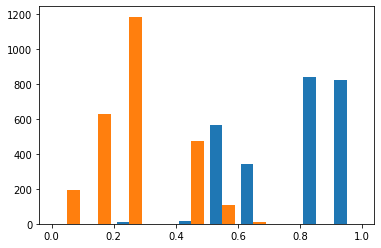

In [35]:
knn.fit(x_train, y_train)
pred_scores = knn.predict_proba(x_test)
plt.hist(pred_scores)

In [36]:
knn.predict_proba(x_test)

array([[0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ]])

In [33]:
knn.predict_proba(x_test).shape

(2602, 2)

## KNN Tasks:

1) Write a function that computes the accuracy of the predicted values for a given score threshold
If score > threshold then prediction = 1 else prediction = 0

In [47]:
# CODE
for i in tqdm(range(10)):
    threshold = i/10
    pred_label = [1 if x[1] >= threshold else 0 for x in pred_scores]
    
    print('Threshold: {} --> total predicted diabetics = {}, prediction accuracy = {:.2f}'.format(threshold, sum(pred_label), accuracy(pred_label, y_test)))

  0%|                                                                     | 0/10 [00:00<?, ?it/s]

Threshold: 0.0 --> total predicted diabetics = 2602, prediction accuracy = 0.22
Threshold: 0.1 --> total predicted diabetics = 2408, prediction accuracy = 0.27
Threshold: 0.2 --> total predicted diabetics = 1780, prediction accuracy = 0.42
Threshold: 0.3 --> total predicted diabetics = 939, prediction accuracy = 0.60
Threshold: 0.4 --> total predicted diabetics = 594, prediction accuracy = 0.67
Threshold: 0.5 --> total predicted diabetics = 118, prediction accuracy = 0.76
Threshold: 0.6 --> total predicted diabetics = 27, prediction accuracy = 0.78
Threshold: 0.7 --> total predicted diabetics = 12, prediction accuracy = 0.78
Threshold: 0.8 --> total predicted diabetics = 0, prediction accuracy = 0.78
Threshold: 0.9 --> total predicted diabetics = 0, prediction accuracy = 0.78


100%|███████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 323.44it/s]


2) Play around with the n_neighbors value. Fit your data on the training data(x_train, y_train). Then evaluate it on both the training data, and the testing data. How does the accuracy of your train and test set predictions change as you increase n_neighbors?


In [58]:
# CODE
for n_neighbors in tqdm([1, 3, 5, 10, 20, 50]):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski')
    knn.fit(x_train, y_train)
    pred_scores = knn.predict_proba(x_test)
    
    base_accuracy = 0.6
    for i in range(10):
        threshold = i/10
        pred_label = [1 if x[1] >= threshold else 0 for x in pred_scores]
        
        acc_score = accuracy(pred_label, y_test)
        if acc_score > base_accuracy:
            base_accuracy = acc_score
            print('N-Neighbors: {} & Threshold: {} --> total predicted diabetics = {}, prediction accuracy = {:.2f}'.format(n_neighbors, threshold, sum(pred_label), acc_score))

  0%|                                                                      | 0/6 [00:00<?, ?it/s]

N-Neighbors: 1 & Threshold: 0.1 --> total predicted diabetics = 689, prediction accuracy = 0.64


 17%|██████████▎                                                   | 1/6 [00:00<00:00,  5.20it/s]

N-Neighbors: 3 & Threshold: 0.4 --> total predicted diabetics = 206, prediction accuracy = 0.74
N-Neighbors: 3 & Threshold: 0.7 --> total predicted diabetics = 37, prediction accuracy = 0.77


 33%|████████████████████▋                                         | 2/6 [00:00<00:00,  5.16it/s]

N-Neighbors: 5 & Threshold: 0.3 --> total predicted diabetics = 764, prediction accuracy = 0.62
N-Neighbors: 5 & Threshold: 0.5 --> total predicted diabetics = 142, prediction accuracy = 0.75
N-Neighbors: 5 & Threshold: 0.7 --> total predicted diabetics = 26, prediction accuracy = 0.78
N-Neighbors: 5 & Threshold: 0.9 --> total predicted diabetics = 1, prediction accuracy = 0.78


 50%|███████████████████████████████                               | 3/6 [00:00<00:00,  5.08it/s]

N-Neighbors: 10 & Threshold: 0.3 --> total predicted diabetics = 939, prediction accuracy = 0.60
N-Neighbors: 10 & Threshold: 0.4 --> total predicted diabetics = 594, prediction accuracy = 0.67
N-Neighbors: 10 & Threshold: 0.5 --> total predicted diabetics = 118, prediction accuracy = 0.76
N-Neighbors: 10 & Threshold: 0.6 --> total predicted diabetics = 27, prediction accuracy = 0.78
N-Neighbors: 10 & Threshold: 0.7 --> total predicted diabetics = 12, prediction accuracy = 0.78
N-Neighbors: 10 & Threshold: 0.8 --> total predicted diabetics = 0, prediction accuracy = 0.78


 67%|█████████████████████████████████████████▎                    | 4/6 [00:00<00:00,  4.85it/s]

N-Neighbors: 20 & Threshold: 0.3 --> total predicted diabetics = 757, prediction accuracy = 0.65
N-Neighbors: 20 & Threshold: 0.4 --> total predicted diabetics = 431, prediction accuracy = 0.71
N-Neighbors: 20 & Threshold: 0.5 --> total predicted diabetics = 40, prediction accuracy = 0.78
N-Neighbors: 20 & Threshold: 0.6 --> total predicted diabetics = 0, prediction accuracy = 0.78


 83%|███████████████████████████████████████████████████▋          | 5/6 [00:01<00:00,  4.49it/s]

N-Neighbors: 50 & Threshold: 0.3 --> total predicted diabetics = 387, prediction accuracy = 0.72
N-Neighbors: 50 & Threshold: 0.4 --> total predicted diabetics = 129, prediction accuracy = 0.77
N-Neighbors: 50 & Threshold: 0.5 --> total predicted diabetics = 0, prediction accuracy = 0.78


100%|██████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.03it/s]


4) You can see what datapoints are closest to a given query point via the [kneighbors function](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors). Which people are most closest to some of the highest scored people in the data?

In [50]:
# CODE
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn.fit(x_train, y_train)
pred_scores = knn.predict_proba(x_test)

In [56]:
highest_score = pred_scores[:, 1].max()
print('Highest Probability Score = {}'.format(highest_score))

Highest Probability Score = 0.7


In [57]:
x_test[pred_scores[:, 1] == highest_score]

,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Race_BLACK ONLY,Race_MULTI-RACIAL,Race_OTHER,Race_UNKNOWN RACE,Race_WHITE ONLY,Obesity_YES,Obesity_NO,...,Smokes_NO,Alcohol Related Disorder_NO,Alcohol Related Disorder_YES,Alcohol Related Disorder_UNKNOWN,Criminal Justice Status_YES,Criminal Justice Status_NO,Criminal Justice Status_UNKNOWN,Private Insurance_NO,Private Insurance_YES,Private Insurance_UNKNOWN
1779,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1262,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4709,0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,1,1,0,0
1637,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1702,0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
5277,0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
223,0,1,0,0,0,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
4628,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1793,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
6934,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


5) Use a different distance metric for the KNN classifier. Evaluate the train/test set accuracies with the new KNN classifier.

In [ ]:
# CODE


6) Use a different weighting function for the KNN classifier. Evaluate the train/test set accuracies with the new KNN classifier.

In [ ]:
# CODE

## Now write a nested for loop that loops over all the parameters and values and store the results in a data frame

### pseudocode

- for k in 1,2,3,4,5...10
  - for distance metric in (metric1, metric2,...)
    - for weighting function in (uniform, distance weighted)
      - train model
      - score test data
      - evaluate - calculate metrics
      - store parameters and evaluation metric in data frame
- print dataframe


     

In [59]:
# code
results = []
for k in tqdm([1, 3, 5, 10, 20]):
    for dist_metric in ["euclidean", "manhattan", "chebyshev", "minkowski"]:
        for wt_func in ["uniform", "distance"]:
            knn = KNeighborsClassifier(n_neighbors=k, metric=dist_metric, weights=wt_func)
            
            #train data & score test data
            knn.fit(x_train, y_train)
            pred_scores = knn.predict_proba(x_test)
            
            # evaluate accuracy
            pred_label = [1 if x[1] >= 0.4 else 0 for x in pred_scores]
            acc_score = accuracy(pred_label, y_test)
            
            #store parameters & accuracy scores in a list of dictionaries
            new_dict = {'k': k, 'metric': dist_metric, 'weights': wt_func, 'accuracy': round(acc_score,2)}
            results.append(new_dict)

results_df = pd.DataFrame(results)
results_df

100%|██████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.57s/it]


,accuracy,k,metric,weights
0,0.64,1,euclidean,uniform
1,0.64,1,euclidean,distance
2,0.64,1,manhattan,uniform
3,0.64,1,manhattan,distance
4,0.64,1,chebyshev,uniform
5,0.64,1,chebyshev,distance
6,0.64,1,minkowski,uniform
7,0.64,1,minkowski,distance
8,0.74,3,euclidean,uniform
9,0.73,3,euclidean,distance


### Exercise for later:
You can now use this data frame to analyze the results and see how the model performs as you modify the parameters.
How does the performance of knn change as you vary differenty parameters?


# Decision Trees

Moving onto decision trees. The [DecisionTreeClassifier constructor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) can take a number of parameters. You should look at all the available 
- criterion: string, "gini' for Gini Impurity or 'entropy' for information gain
- splitter: string,  "best" or 'random'
- max_features: the number of features to consider when looking for the best split.
- max_depth: int, the maximum depth of the tree.
- min_samples_split: minimum number of samples required to split an internal node
- min_samples_leaf: min number of samples required to be at a leaf node.
- max_leaf_nodes: max number of leaf nodes a tree can have

We can do the same fit/predict_proba/calculate accuracy:

### Let's first fit a decision tree model 

In [60]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Now predict scores on the test set and plot the distribution of scores

(array([279., 973., 900., 186., 176.,  31.,  18.,  12.,   0.,  27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

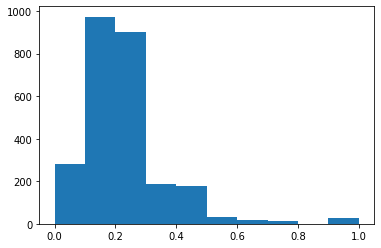

In [61]:
predicted_scores_test = dec_tree.predict_proba(x_test)[:,1]
plt.hist(predicted_scores_test)

### now we can select a threshold and calculate accuracy

In [66]:
threshold = 0.4
calc_threshold = lambda x,y: 0 if x < y else 1 
predicted_test = np.array( [calc_threshold(score, threshold) for score in predicted_scores_test] )
test_acc = accuracy(predicted_test, y_test)
print(test_acc)

0.7428900845503459


### let's now explore how the performance changes as we change parameters

We'll be interested in how each of these parameters will affect the performance of a Decision Tree classifier.

For example: Increasing max_depth this should increase your model's ability to explain the data and eventually overfit the training data once it's high enough. The performance on the test set should degrade a bit as the training set is overfitted.

In [67]:
threshold = 0.4
depths = [1, 3, 5, 7, 9, 20, 50, 100]
for d in tqdm(depths):
    dec_tree = DecisionTreeClassifier(max_depth=d)
    dec_tree.fit(x_train, y_train)

    train_scores = dec_tree.predict_proba(x_train)[:,1]
    test_scores = dec_tree.predict_proba(x_test)[:,1]
   
    predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
    train_acc = accuracy(predicted_train, y_train)   

    predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
    test_acc = accuracy(predicted_test, y_test)
    
    print("Depth: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(d, train_acc, test_acc))

  0%|                                                                      | 0/8 [00:00<?, ?it/s]

Depth: 1 | Train acc: 0.79 | Test acc: 0.78
Depth: 3 | Train acc: 0.79 | Test acc: 0.78
Depth: 5 | Train acc: 0.77 | Test acc: 0.75
Depth: 7 | Train acc: 0.77 | Test acc: 0.74
Depth: 9 | Train acc: 0.78 | Test acc: 0.74
Depth: 20 | Train acc: 0.78 | Test acc: 0.74


 75%|██████████████████████████████████████████████▌               | 6/8 [00:00<00:00, 54.93it/s]

Depth: 50 | Train acc: 0.78 | Test acc: 0.74
Depth: 100 | Train acc: 0.78 | Test acc: 0.74


100%|██████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 54.62it/s]


## Decision Tree Tasks
1) Repeat the above with each parameter in DecisionTreeClassifier. What range of values makes sense for each parameter?
(IE: does it make sense to have max_depth greater than 7 or 8 for this dataset?)

In [71]:
# CODE
threshold = 0.4
criteria = ['gini', 'entropy']
depths = range(4,9)
min_splits = [0.05, 0.10]
max_features = ['sqrt', 'log2']

for criterion in tqdm(criteria):
    for d in depths:
        for split in min_splits:
            for max_ftr in max_features:
                dec_tree = DecisionTreeClassifier(criterion=criterion, 
                                                  max_depth=d, 
                                                  min_samples_split=split, 
                                                  max_features=max_ftr)
                dec_tree.fit(x_train, y_train)

                train_scores = dec_tree.predict_proba(x_train)[:,1]
                test_scores = dec_tree.predict_proba(x_test)[:,1]

                predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
                train_acc = accuracy(predicted_train, y_train)   

                predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
                test_acc = accuracy(predicted_test, y_test)

                print("Criterion: {} | Depth: {} | Min Split: {} | Max Features: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(criterion, d, split, max_ftr, train_acc, test_acc))

  0%|                                                                      | 0/2 [00:00<?, ?it/s]

Criterion: gini | Depth: 4 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.79 | Test acc: 0.78
Criterion: gini | Depth: 4 | Min Split: 0.05 | Max Features: log2 | Train acc: 0.79 | Test acc: 0.78
Criterion: gini | Depth: 4 | Min Split: 0.1 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.77
Criterion: gini | Depth: 4 | Min Split: 0.1 | Max Features: log2 | Train acc: 0.78 | Test acc: 0.77
Criterion: gini | Depth: 5 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.77
Criterion: gini | Depth: 5 | Min Split: 0.05 | Max Features: log2 | Train acc: 0.78 | Test acc: 0.77
Criterion: gini | Depth: 5 | Min Split: 0.1 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.77
Criterion: gini | Depth: 5 | Min Split: 0.1 | Max Features: log2 | Train acc: 0.79 | Test acc: 0.78
Criterion: gini | Depth: 6 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.76
Criterion: gini | Depth: 6 | Min Split: 0.05 | Max Features: log2 | Train acc: 0.78 | Test acc:

 50%|███████████████████████████████                               | 1/2 [00:00<00:00,  3.62it/s]

Criterion: entropy | Depth: 4 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.79 | Test acc: 0.78
Criterion: entropy | Depth: 4 | Min Split: 0.05 | Max Features: log2 | Train acc: 0.78 | Test acc: 0.77
Criterion: entropy | Depth: 4 | Min Split: 0.1 | Max Features: sqrt | Train acc: 0.79 | Test acc: 0.78
Criterion: entropy | Depth: 4 | Min Split: 0.1 | Max Features: log2 | Train acc: 0.77 | Test acc: 0.76
Criterion: entropy | Depth: 5 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.77
Criterion: entropy | Depth: 5 | Min Split: 0.05 | Max Features: log2 | Train acc: 0.79 | Test acc: 0.78
Criterion: entropy | Depth: 5 | Min Split: 0.1 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.77
Criterion: entropy | Depth: 5 | Min Split: 0.1 | Max Features: log2 | Train acc: 0.79 | Test acc: 0.78
Criterion: entropy | Depth: 6 | Min Split: 0.05 | Max Features: sqrt | Train acc: 0.78 | Test acc: 0.76
Criterion: entropy | Depth: 6 | Min Split: 0.05 | Max Features: log2

100%|██████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.78it/s]


2) What do you think will happen if you normalize/scale one of the features of your dataset before passing it into the DecisionTreeClassifier.fit function? Try modifying one of your columns and rerun the evaluations above.
Do the results change? Why does/doesnt this change the resulting model?

In [ ]:
# CODE

3) How does changing the "criterion" parameter affect your model. Is Gini better than Information Gain? Do not change the other parameters(max_depth, min_sample_split, etc) while doing this.

In [ ]:
# CODE

4) Decision Trees are widely used in practice because they're very interpretable. Check out the [feature_importances](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute of the DecisionTreeClassifier. What features are the most informative according to this model?

In [79]:
# CODE
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=8)
dec_tree.fit(x_train, y_train)
# dec_tree.feature_importances_
d = {'Features': x_train.columns, "Importance":dec_tree.feature_importances_}
pd.DataFrame(d).sort_values(by=["Importance"], ascending=False)

,Features,Importance
9,Obesity_NO,0.299304
16,Criminal Justice Status_YES,0.089078
5,Race_OTHER,0.068083
14,Alcohol Related Disorder_YES,0.056440
11,Smokes_YES,0.055271
3,Race_BLACK ONLY,0.053120
0,Sex_FEMALE,0.047025
12,Smokes_NO,0.042968
19,Private Insurance_NO,0.040613
15,Alcohol Related Disorder_UNKNOWN,0.038220


## Visualizing a Decision Tree
We can visualize decision trees by exporting the model in graphviz format using the [sklearn.tree.export_graphviz function](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html). This can be very useful in diagnosing potential issues with your Decision Tree Classifier giving you poor results.

In [81]:

viz = tree.export_graphviz(dec_tree, feature_names=x_train.columns,
                           class_names=['Europe', 'Not Europe'],
                           rounded=True, filled=True)

# with open("tree.dot") as f:
#     dot_graph = f.read()
#     graph = graphviz.Source(dot_graph)
# graph

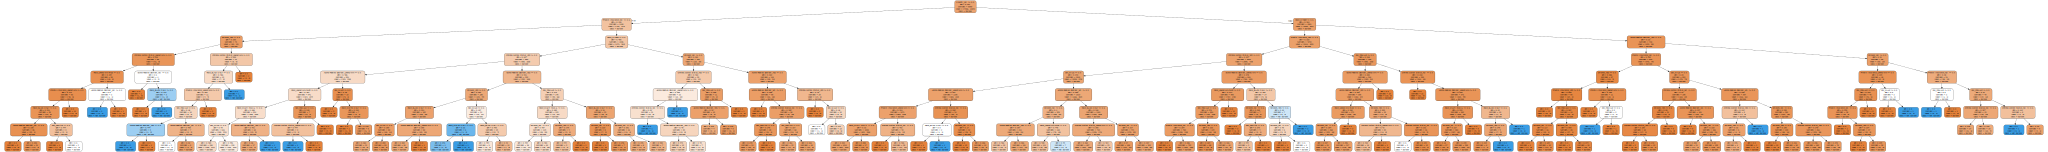

In [84]:
graphviz.Source(viz)

5) Visualize the decision tree of your best performing decision tree. Is there anything surprising about the splits that are most informative of this classification task?

In [ ]:
# CODE

### Exercise for later:
Now write a nested for loop that loops over all the parameters and values and store the results in a data frame.
You can now use this data frame to analyze the results and see how the model performs as you modify the parameters.
How does the performance of decision tree change as you vary differenty parameters?





In [ ]:
# CODE

# References
http://scikit-learn.org/stable/modules/neighbors.html#classification
    
http://scikit-learn.org/stable/modules/tree.html#tree